# Convolutional Neural Network

__1. Image Input Data :-__

Let’s assume we have a dataset of gray scale images. Each image has the same size of 32 pixels wide and 32 pixels high, and pixel values are between 0 and 255, e.g. a matrix of 32 X 32 X 1 or 1,024 pixel values. Image input data is expressed as a 3-dimensional matrix of width X height X channels. If we were using color images in our example, we would have 3 channels for the red, green and blue pixel values, e.g. 32 X 32 X 3.

__2. Convolutional Layer :-__

We define a convolutional layer with 10 filters and a receptive field 5 pixels wide and 5 pixels high and a stride length of 1. Because each filter can only get input from (i.e. see) 5 X 5 (25) pixels at a time, we can calculate that each will require 25 + 1 input weights (plus 1 for the bias input). Dragging the 5 X 5 receptive field across the input image data with a stride width of 1 will result in a feature map of 28 X 28 output values or 784 distinct activations per image.
We have 10 filters, so that is 10 different 28 X 28 feature maps or 7,840 outputs that will be created for one image. Finally, we know we have 26 inputs per filter, 10 filters and 28 X 28 output values to calculate per filter, therefore we have a total of 26 X 10 X 28 X 28 or 203,840 connections in our convolutional layer, we want to phrase it using traditional neural network nomenclature. Convolutional layers also make use of a nonlinear transfer function as part of activation and the rectifier activation function is the popular default to use.

__3. Pool Layer :-__

We define a pooling layer with a receptive field with a width of 2 inputs and a height of 2 inputs. We also use a stride of 2 to ensure that there is no overlap. This results in feature maps that are one half the size of the input feature maps. From 10 different 28 X 28 feature maps as input to 10 different 14 X 14 feature maps as output. We will use a max() operation for each receptive field so that the activation is the maximum input value.

__4. Fully Connected Layer :-__
Finally, we can flatten out the square feature maps into a traditional flat fully connected layer. We can define the fully connected layer with 200 hidden neurons, each with 10 ⇥ 14 ⇥ 14 input connections, or 1,960 + 1 weights per neuron. That is a total of 392,200 connections and weights to learn in this layer. We can use a sigmoid or softmax transfer function to output probabilities of class values directly.


## Best Practices in CNN 

1. __Receptive Field Size__: The patch should be as small as possible, but large enough to see features in the input data. It is common to use 3 X 3 on small images and 5 X 5 or 7 X 7 and more on larger image sizes.
2. __Stride Width__: Use the default stride of 1. It is easy to understand and you don’t need padding to handle the receptive field falling off the edge of your images. This could be increased to 2 or larger for larger images.
3. __Number of Filters__: Filters are the feature detectors. Generally fewer filters are used at the input layer and increasingly more filters used at deeper layers.
4. __Padding__: Set to zero and called zero padding when reading non-input data. This is useful when you cannot or do not want to standardize input image sizes or when you want to use receptive field and stride sizes that do not neatly divide up the input image size.
5. __Pooling__: Pooling is a destructive or generalization process to reduce overfitting. Receptive field size is almost always set to 2 X 2 with a stride of 2 to discard 75% of the activations from the output of the previous layer.
6. __Pattern Architecture__: It is common to pattern the layers in your network architecture. This might be one, two or some number of convolutional layers followed by a pooling layer. This structure can then be repeated one or more times. Finally, fully connected layers are often only used at the output end and may be stacked one, two or more deep.
7. __Dropout__: CNNs have a habit of overfitting, even with pooling layers. Dropout should be used such as between fully connected layers and perhaps after pooling layers.

## Handwritten Digit Recognition

In [19]:
import numpy as np
import pandas as pd

#Import from keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D

#import from matplotlib
import matplotlib.pyplot as plt

In [2]:
# loading the MNIST dataset
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

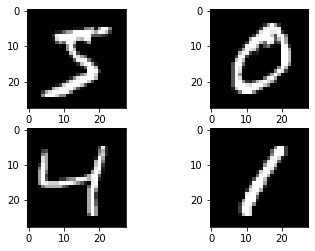

In [3]:
# Plotting few examples
plt.subplot(221)
plt.imshow(X_train[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap = plt.get_cmap('gray'))
plt.show()

We will first build a multilayer perceptron model.

## Baseline model using Multilayer Perceptron

In [4]:
# Setting the random seed
seed = 7
np.random.seed(seed)

In [5]:
# loading the MNIST dataset
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [6]:
# flatten the 28 X 28 image to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype("float32")
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype("float32")

In [7]:
# Scaling of the input variables from 0-255 to 0-1.
X_train = X_train/255
X_test = X_test/255

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
# Define the baseline model
def baseline_model():
    #Create Model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim = num_pixels, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(num_classes, kernel_initializer = 'normal', activation = 'softmax'))
    # Compile Model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [10]:
# Build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), 
          epochs = 10, batch_size = 200, verbose = 2)

# Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Baseline Error: %.2f%%" %(100- scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2798 - accuracy: 0.9208 - val_loss: 0.1412 - val_accuracy: 0.9572
Epoch 2/10
 - 5s - loss: 0.1116 - accuracy: 0.9675 - val_loss: 0.0919 - val_accuracy: 0.9704
Epoch 3/10
 - 5s - loss: 0.0717 - accuracy: 0.9798 - val_loss: 0.0781 - val_accuracy: 0.9777
Epoch 4/10
 - 5s - loss: 0.0503 - accuracy: 0.9858 - val_loss: 0.0742 - val_accuracy: 0.9772
Epoch 5/10
 - 6s - loss: 0.0372 - accuracy: 0.9893 - val_loss: 0.0686 - val_accuracy: 0.9786
Epoch 6/10
 - 6s - loss: 0.0269 - accuracy: 0.9928 - val_loss: 0.0619 - val_accuracy: 0.9807
Epoch 7/10
 - 6s - loss: 0.0205 - accuracy: 0.9950 - val_loss: 0.0611 - val_accuracy: 0.9811
Epoch 8/10
 - 5s - loss: 0.0141 - accuracy: 0.9969 - val_loss: 0.0621 - val_accuracy: 0.9806
Epoch 9/10
 - 5s - loss: 0.0107 - accuracy: 0.9979 - val_loss: 0.0578 - val_accuracy: 0.9812
Epoch 10/10
 - 5s - loss: 0.0079 - accuracy: 0.9986 - val_loss: 0.0581 - val_accuracy: 0.9812
Baseline Error: 1.8

The error from baseline model is 1.88%.

## Simple Convolutional Neural Network 

In [39]:
# Setting the random seed
seed = 7
np.random.seed(seed)

# loading the MNIST dataset
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")

In [40]:
# Scaling of the input variables from 0-255 to 0-1.
X_train = X_train/255
X_test = X_test/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

#### Our CNN structure

1. The first hidden layer is a convolution layer. The layer has 32 feature map, which with the size of 5 X 5 and a rectifier activation function.

2. A pooling layer with a pool size of 2 X 2.

3. The next layer is a regularization layer using dropout.

4. Next is a layer that converts the 2D matrix data to a vector called Flatten.

5. Next a fully connected layer with 128 neurons and rectifier activation function is used.

6. The output layer has 10 neurons for the 10 classes and a softmax activation function.

In [43]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32, (5,5), padding='valid', input_shape = (28,28,1),
                     activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [44]:
# Build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 200, verbose = 2)

# Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Baseline Error: %.2f%%" %(100- scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 43s - loss: 0.2515 - accuracy: 0.9273 - val_loss: 0.0949 - val_accuracy: 0.9721
Epoch 2/10
 - 45s - loss: 0.0782 - accuracy: 0.9764 - val_loss: 0.0524 - val_accuracy: 0.9829
Epoch 3/10
 - 43s - loss: 0.0532 - accuracy: 0.9844 - val_loss: 0.0417 - val_accuracy: 0.9861
Epoch 4/10
 - 43s - loss: 0.0418 - accuracy: 0.9876 - val_loss: 0.0381 - val_accuracy: 0.9873
Epoch 5/10
 - 42s - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.0401 - val_accuracy: 0.9872
Epoch 6/10
 - 43s - loss: 0.0277 - accuracy: 0.9914 - val_loss: 0.0369 - val_accuracy: 0.9882
Epoch 7/10
 - 44s - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0336 - val_accuracy: 0.9892
Epoch 8/10
 - 45s - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0322 - val_accuracy: 0.9899
Epoch 9/10
 - 45s - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0323 - val_accuracy: 0.9898
Epoch 10/10
 - 45s - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0368 - val_accuracy: 0.9891
Baseline 

The error has reduced to 1.09%, which is lesser than what we got with multilayer perceptron model above.